In [2]:
import csv
import cv2
import numpy as np
import sklearn
import random

def open_csv_file(csv_file):
    lines=[]
    with open(csv_file) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines.append(line)
    lines = lines[1:]
    return lines

def histogram(samples):
    bins=[0,0,0,0,0,0,0,0,0,0]
    for line in samples:
        val = float(line[3])
        if val >= -1. and val <=-0.8:
            bins[0]+=1
        elif val > -0.8 and val <=-0.6:
            bins[1]+=1
        elif val > -0.6 and val <=-0.4:
            bins[2]+=1
        elif val > -0.4 and val <=-0.2:
            bins[3]+=1
        elif val > -0.2 and val <=0.:
            bins[4]+=1
        elif val > 0. and val <=0.2:
            bins[5]+=1
        elif val > 0.2 and val <=0.4:
            bins[6]+=1
        elif val > 0.4 and val <=0.6:
            bins[7]+=1
        elif val > 0.6 and val <=0.8:
            bins[8]+=1
        elif val > 0.8 and val <=1.:
            bins[9]+=1
    return bins

def flatten_histogram(samples):
    bins=[0,0,0,0,0,0,0,0,0,0]
    new_samples=[]
    for line in samples:
        val = float(line[3])
        if ((val >= -1. and val <= -0.8 and random.random() <= 1. ) or
            (val > -0.8 and val <= -0.6 and random.random() <= 1. ) or
            (val > -0.6 and val <= -0.4 and random.random() <= 1. ) or
            (val > -0.4 and val <= -0.2 and random.random() <= 0.6) or
            (val > -0.2 and val <= 0.   and random.random() <= 0.1) or
            (val > 0.   and val <= 0.2  and random.random() <= 0.2) or
            (val > 0.2  and val <= 0.4  and random.random() <= 0.6) or
            (val > 0.4  and val <= 0.6  and random.random() <= 1. ) or
            (val > 0.6  and val <= 0.8  and random.random() <= 1. ) or
            (val > 0.8  and val <= 1.   and random.random() <= 1. )):
            new_samples.append(line)
    return new_samples

def import_images(lines, path):
    images=[]
    measurements=[]
    for line in lines:
        for i in range(3):
            source_path = line[i]
            filename = source_path.split('/')[-1]
            current_path = path + filename
            image = cv2.imread(current_path)
            #images.append(image)
            images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            measurement = float(line[3])
            correction = 0.28
            if   i == 0:
                measurements.append(measurement)
            elif i == 1:
                measurements.append(measurement + correction)
            elif i == 2:
                measurements.append(measurement - correction)
    return images, measurements

def augment_images(images, measurements):
    out_images=[]
    out_measurements=[]
    for image, measurement in zip(images, measurements):
        out_images.append(image)
        out_measurements.append(measurement)
        out_images.append(cv2.flip(image,1))
        out_measurements.append(measurement*-1.0)
    return out_images, out_measurements

In [5]:
samples = open_csv_file('../car-sim-data/driving_log.csv')
random_sample = random.sample(samples, 5)
images, angles = import_images(random_sample, '../car-sim-data/IMG/')
images, angles = augment_images(images, angles)

print('Number of total samples:', 3*2*len(samples))

Number of total samples: 62778


In [7]:
import pandas as pd
import csv
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

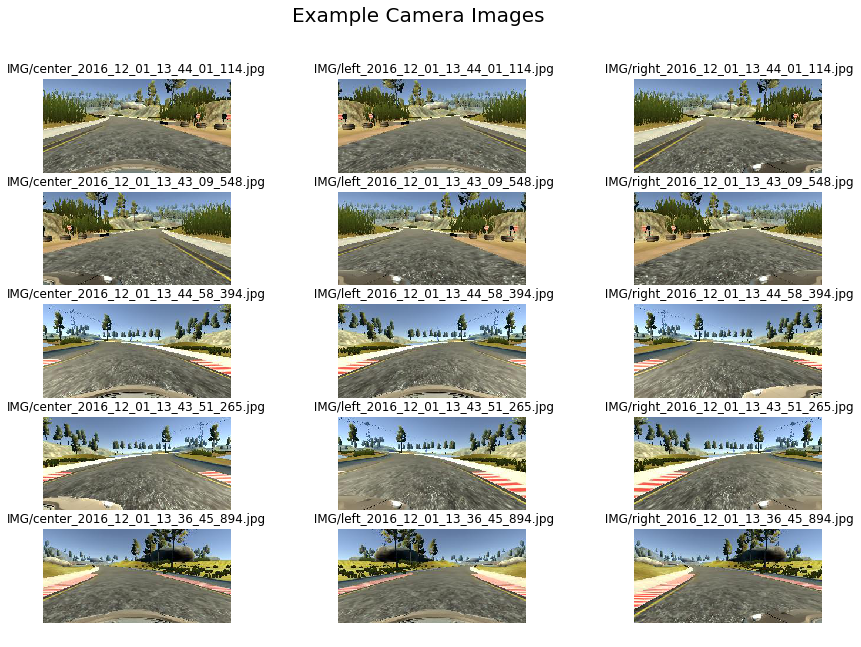

In [21]:
## Plotting camera images
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Example Camera Images', fontsize=20)
image_index=0
for image in images[:15]:
    fg = fig.add_subplot(5, 3, image_index+1)
    fg.set_title(random_sample[int(image_index/3)][image_index%3])
    plt.axis('off')
    plt.imshow(image)
    image_index+=1
plt.show()

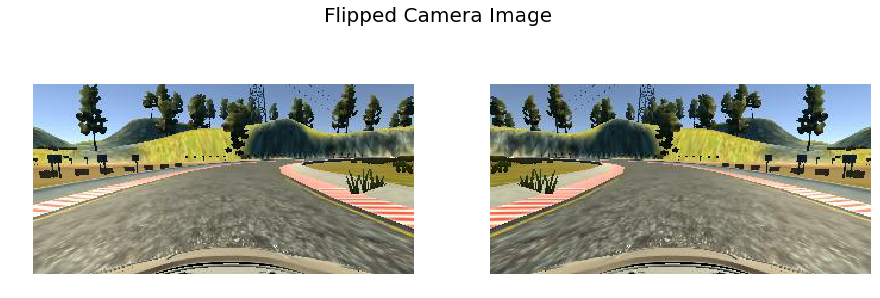

In [19]:
## Plotting flipped images
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Flipped Camera Image', fontsize=20)
image_index=19

fg = fig.add_subplot(1, 2, 1)
#fg.set_title(random_sample[int(image_index/3)][image_index%3])
plt.axis('off')
plt.imshow(images[image_index])

fg = fig.add_subplot(1, 2, 2)
#fg.set_title(random_sample[int(image_index/3)][image_index%3])
plt.axis('off')
plt.imshow(images[image_index-1])

plt.show()

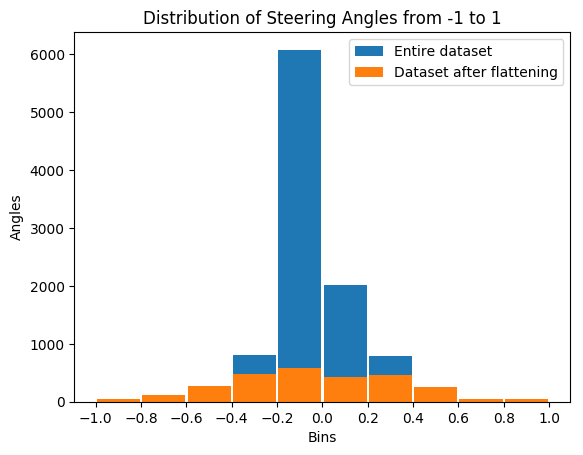

In [46]:
import matplotlib.pyplot as plt; plt.rcdefaults()

x = range(0, 20, 2)
x=np.arange(-.9, 1., .2)
xticks=np.arange(-1., 1.2, .2)
plt.xticks(xticks)

bins = histogram(samples)
p1=plt.bar(x, bins, width=0.19)

bins_flattened = histogram(flatten_histogram(samples))
p2=plt.bar(x, bins_flattened, width=0.19)

plt.title('Distribution of Steering Angles from -1 to 1')
plt.ylabel('Angles')
plt.xlabel('Bins')
plt.legend((p1[0], p2[0]), ('Entire dataset', 'Dataset after flattening'))

plt.show()

In [103]:
# Print layer sizes (with VALID padding)
import math

def print_layer_sizes(H, W, F, S, x):
  print(H,'x',W)
  for i in range(x):
    H = math.ceil(float(H - F + 1) / float(S))
    W = math.ceil(float(W - F + 1) / float(S))
    print(H,'x',W)
  return H, W

H = 65 # height
W = 320 # width

F = 5 # filters
S = 2 # stride

H, W = print_layer_sizes(H, W, F, S, 3)

F = 3
S = 1

H, W = print_layer_sizes(H, W, F, S, 2)


65 x 320
31 x 158
14 x 77
5 x 37
5 x 37
3 x 35
1 x 33
